# 深度学习机器学习框架TensorFlow

### 面授班讲义  by 杨庆跃
请安装最新版本Jupyter notebook进行编程实验

### tensorflow安装方法
- 1、（建议）Anaconda 图形界面工具  
- 2、进入 “Anaconda Prompt”，执行“pip install tensorflow”  
- 3、各种IDE（比如有Spyder）里面执行“pip install tensorflow”  

keras中文文档 https://keras-cn.readthedocs.io

### TensorFlow手写识别

In [1]:
import tensorflow as tf
# mnist = tf.keras.datasets.mnist

#下面是官方示例中下载数据的代码，无法运行！！！
# (x_train, y_train),(x_test, y_test) = mnist.load_data() 

import numpy as np
path='d:/ai/data/mnist.npz'
f = np.load(path)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

# x_train.shape [6000,28,28] #60000张图片，每个是28*28像素
x_train, x_test = x_train / 255.0, x_test / 255.0 #把每个像素的取值压缩到0-1之间，减小运算量

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train[:1000], y_train[:1000], epochs=3)
model.evaluate(x_test[:1000], y_test[:1000])

Epoch 1/3
1000/1000 [==============================] - 1s 871us/step - loss: 1.1103 - acc: 0.6770
Epoch 2/3
1000/1000 [==============================] - 0s 473us/step - loss: 0.3344 - acc: 0.9020
Epoch 3/3
1000/1000 [==============================] - 0s 214us/step


[0.39620207500457766, 0.872]

#### 浏览图片

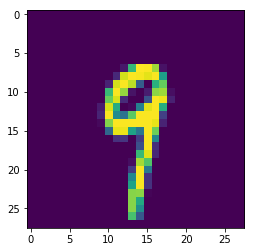

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(x_train[600].reshape((28,28)))
#plt.colorbar()
plt.grid(False)

#### 预测

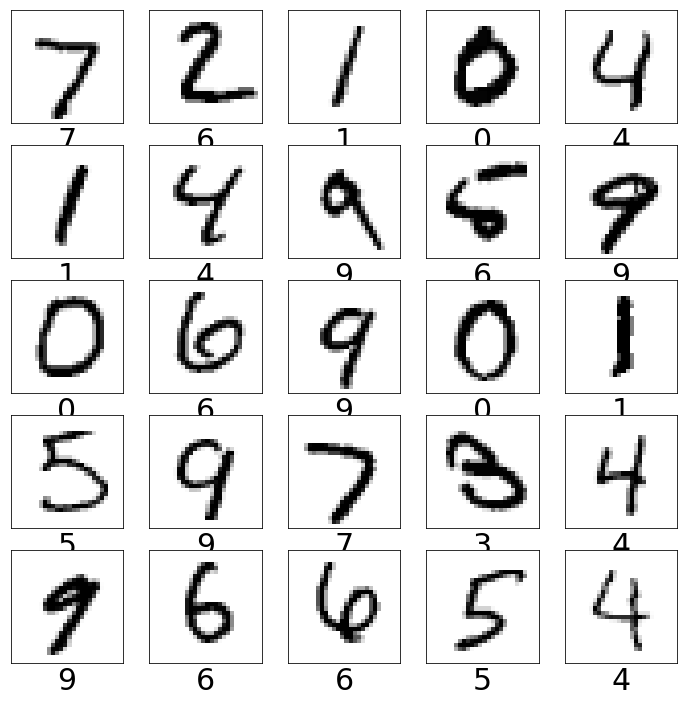

In [3]:
predictions = model.predict(x_test)
plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i].reshape((28,28)), cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]),fontsize=30)


## 卷积神经网络CNN

In [ ]:
import tensorflow as tf
# mnist = tf.keras.datasets.mnist

#下面是官方示例中下载数据的代码，无法运行！！！
# (x_train, y_train),(x_test, y_test) = mnist.load_data() 

import numpy as np
path='d:/ai/data/mnist.npz'
f = np.load(path)
x_train, y_train = f['x_train'], f['y_train']
x_test, y_test = f['x_test'], f['y_test']
f.close()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32,(3,3),padding='same',input_shape=input_shape,data_format="channels_last"),
  tf.keras.layers.PReLU(),
  tf.keras.layers.Conv2D(64,(3,3),padding='same',input_shape=input_shape,data_format="channels_last"),
  tf.keras.layers.PReLU(),
  tf.keras.layers.MaxPool2D((2,2)),    
  tf.keras.layers.Conv2D(128,(3,3),strides=2,padding='same',input_shape=input_shape,data_format="channels_last"),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(x_train[:10000],y_train[:10000], batch_size=128, epochs=5)

model.evaluate(x_test[:1000], y_test[:1000])


Epoch 1/5
10000/10000 [==============================] - 86s 9ms/step - loss: 0.4962 - acc: 0.8543
Epoch 2/5
10000/10000 [==============================] - 91s 9ms/step - loss: 0.1174 - acc: 0.9639
Epoch 3/5
10000/10000 [==============================] - 80s 8ms/step - loss: 0.0791 - acc: 0.9747
Epoch 4/5
 7296/10000 [====================>.........] - ETA: 25s - loss: 0.0487 - acc: 0.9860

### 使用LSTM预测正弦sin函数

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x0000000016D6EE80>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': 'model/'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from model/model.ckpt-3000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tens

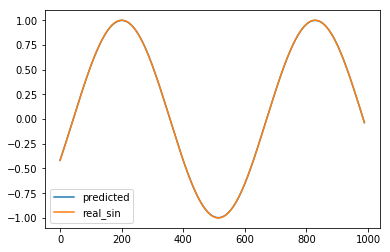

In [2]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import matplotlib as mpl
from matplotlib import pyplot as plt
from tensorflow.contrib.learn.python.learn.estimators.estimator import SKCompat

# TensorFlow的高层封装TFLearn
learn = tf.contrib.learn

# 神经网络参数
HIDDEN_SIZE = 30  # LSTM隐藏节点个数
NUM_LAYERS = 2  # LSTM层数
TIMESTEPS = 10  # 循环神经网络截断长度
BATCH_SIZE = 32  # batch大小

# 数据参数
TRAINING_STEPS = 3000  # 训练轮数
TRAINING_EXAMPLES = 10000  # 训练数据个数
TESTING_EXAMPLES = 1000  # 测试数据个数
SAMPLE_GAP = 0.01  # 采样间隔


def generate_data(seq):
    # 序列的第i项和后面的TIMESTEPS-1项合在一起作为输入，第i+TIMESTEPS项作为输出
    X = []
    y = []
    for i in range(len(seq) - TIMESTEPS - 1):
        X.append([seq[i:i + TIMESTEPS]])
        y.append([seq[i + TIMESTEPS]])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)


# LSTM结构单元
def LstmCell():
    lstm_cell = tf.contrib.rnn.BasicLSTMCell(HIDDEN_SIZE)
    return lstm_cell


def lstm_model(X, y):
    # 使用多层LSTM，不能用lstm_cell*NUM_LAYERS的方法，会导致LSTM的tensor名字都一样
    cell = tf.contrib.rnn.MultiRNNCell([LstmCell() for _ in range(NUM_LAYERS)])

    # 将多层LSTM结构连接成RNN网络并计算前向传播结果
    output, _ = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
    output = tf.reshape(output, [-1, HIDDEN_SIZE])

    # 通过无激活函数的全联接层计算线性回归，并将数据压缩成一维数组的结构
    predictions = tf.contrib.layers.fully_connected(output, 1, None)

    # 将predictions和labels调整为统一的shape
    y = tf.reshape(y, [-1])
    predictions = tf.reshape(predictions, [-1])

    # 计算损失值
    loss = tf.losses.mean_squared_error(predictions, y)

    # 创建模型优化器并得到优化步骤
    train_op = tf.contrib.layers.optimize_loss(
        loss,
        tf.train.get_global_step(),
        optimizer='Adagrad',
        learning_rate=0.1)

    return predictions, loss, train_op


# 用sin生成训练和测试数据集
test_start = TRAINING_EXAMPLES * SAMPLE_GAP
test_end = (TRAINING_EXAMPLES + TESTING_EXAMPLES) * SAMPLE_GAP
train_X, train_y = generate_data(
    np.sin(np.linspace(0, test_start, TRAINING_EXAMPLES, dtype=np.float32)))
test_X, test_y = generate_data(
    np.sin(
        np.linspace(test_start, test_end, TESTING_EXAMPLES, dtype=np.float32)))

# 建立深层循环网络模型
regressor = SKCompat(learn.Estimator(model_fn=lstm_model, model_dir='model/'))

# 调用fit函数训练模型
regressor.fit(train_X, train_y, batch_size=BATCH_SIZE, steps=TRAINING_STEPS)

# 使用训练好的模型对测试集进行预测
predicted = [[pred] for pred in regressor.predict(test_X)]

# 计算rmse作为评价指标
rmse = np.sqrt(((predicted - test_y)**2).mean(axis=0))
print('Mean Square Error is: %f' % (rmse[0]))

# 对预测曲线绘图，并存储到sin.jpg
fig = plt.figure()
plot_predicted, = plt.plot(predicted, label='predicted')
plot_test, = plt.plot(test_y, label='real_sin')
plt.legend([plot_predicted, plot_test], ['predicted', 'real_sin'])
plt.show()

### 补充内容，人脸识别
下载人脸数据集lfw.tgz，解压到 D:\Anaconda3\Lib\site-packages\facenet\datasets\lfw  
启动anacondapython进入facenet目录D:\Anaconda3\Lib\site-packages\facenet ，执行下列语句把图像转成160*160  
python src/align/align_dataset_mtcnn.py datasets/lfw datasets/lfw_mtcnnpy_160 --image_size 160 --margin 32 --random_order  
   
到https://github.com/davidsandberg/facenet  下载训练好的模型，我用的是20180402-114759	0.9965	VGGFace2
模型放到 models目录下，执行下面语句验证模型  
python src/validate_on_lfw.py dataset/lfw_mtcnnpy_160 models/20180408-102900 
人脸对比命令如下：  
python src/compare.py models/20180408-102900 1.png 2.png  